In [ ]:
cfrom google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI_Assignment
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI_Assignment
Classification.ipynb  Life-Expectancy-Data-Updated.csv	mental_health_dataset.csv  Regression.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**For Classification Task :**

**1. Exploratory Data Analysis and Data Understanding [5]:**

Choosing a Dataset:

• Select a dataset of your choice that interests you and aligns with one of the United Nations Sustainable Development Goals (UNSDG).

• Load the dataset into a DataFrame object using the Pandas library.

**• Perform an initial analysis to gather a detailed description of the dataset. For example:**

  **(a) When and by whom was the dataset created?**

  --> The Mental Health dataset was created by  Kevin Thomas and is available on Kaggle. The dataset was last updated on April 7, 2022.

  **(b) How did you access the dataset?**

--> The Mental Health dataset
was accessed via Kaggle, a popular platform for open datasets and machine learning resources.


The dataset was downloaded from Kaggle.
It was then uploaded manually to this environment for analysis.
The dataset was loaded into a Pandas DataFrame using the read_csv() function for further processing and exploration.

**(c) How does it align with the chosen UNSDG?**

--> This dataset aligns with United Nations Sustainable Development Goal (UNSDG) 3: Good Health and Well-being, as it focuses on mental health conditions, work-life balance, and lifestyle factors that impact well-being.

**• Identify potential questions that the dataset could help answer.**


1.  How do work hours and sleep affect mental health severity?

2. Is there a correlation between stress level and physical activity?

3. Are people who seek mental health consultation experiencing lower severity?

4. What is the gender and occupation distribution among individuals with severe mental health conditions?

**• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).**

--> Completeness: The dataset has missing values in the Severity column (501 missing).

Relevance: Covers key mental health indicators, making it highly relevant.

Data Quality: Mostly structured, with categorical and numerical attributes that are suitable for analysis.

In [ ]:
#Load the dataset
df = pd.read_csv("mental_health_dataset.csv")
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [ ]:
print("\nSummary Statistics of Numerical Columns:")
print(df.describe())


Summary Statistics of Numerical Columns:
           User_ID         Age  Sleep_Hours   Work_Hours  \
count  1000.000000  1000.00000  1000.000000  1000.000000   
mean    500.500000    41.89200     7.095600    54.621000   
std     288.819436    13.97475     1.713861    14.709035   
min       1.000000    18.00000     4.000000    30.000000   
25%     250.750000    30.00000     5.600000    42.000000   
50%     500.500000    42.00000     7.100000    55.000000   
75%     750.250000    54.00000     8.500000    67.000000   
max    1000.000000    65.00000    10.000000    80.000000   

       Physical_Activity_Hours  
count              1000.000000  
mean                  5.134000  
std                   3.081808  
min                   0.000000  
25%                   3.000000  
50%                   5.000000  
75%                   8.000000  
max                  10.000000  


In [ ]:
# List all attributes (columns) present in the dataset
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Country',
       'Mental_Health_Condition', 'Severity', 'Consultation_History',
       'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours'],
      dtype='object')


In [ ]:
# Generate summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=["object"]))


Summary Statistics for Categorical Columns:
        Gender Occupation    Country Mental_Health_Condition Severity  \
count     1000       1000       1000                    1000      499   
unique       4          7          7                       2        3   
top     Female      Other  Australia                     Yes      Low   
freq       270        161        160                     515      176   

       Consultation_History Stress_Level  
count                  1000         1000  
unique                    2            3  
top                      No         High  
freq                    505          342  


In [ ]:
# **1. Checking for Missing Values**
missing_values = df.isnull().sum()
print(f"Missing Values Per Column:\n{missing_values}\n")

Missing Values Per Column:
User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64



In [ ]:
# **2. Checking for Duplicate Rows**
duplicate_rows = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows}")

Total Duplicate Rows: 0


In [ ]:
# **5. Checking Data Types of Each Column**
data_types = df.dtypes
print("\nData Types of Each Column:")
print(data_types)


Data Types of Each Column:
User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object


<ipython-input-81-4777a8543022>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Severity", palette="coolwarm", order=df['Severity'].value_counts().index)


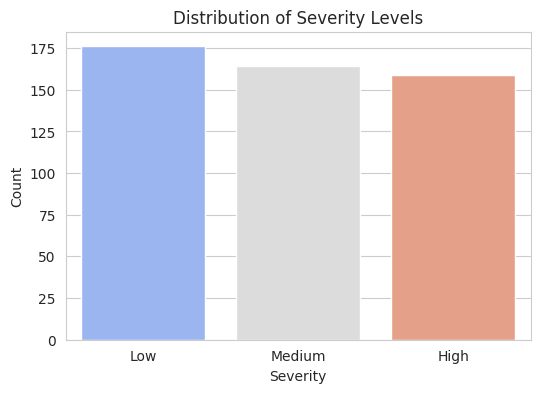

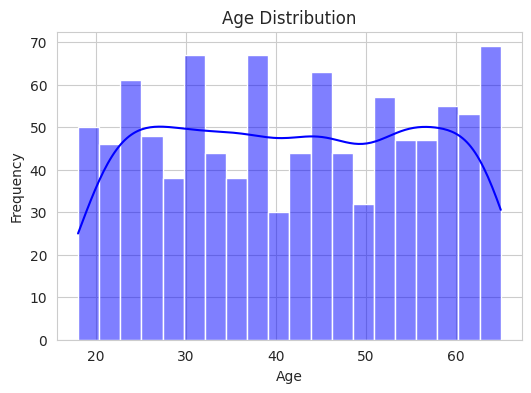

<ipython-input-81-4777a8543022>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Severity", y="Sleep_Hours", palette="pastel")


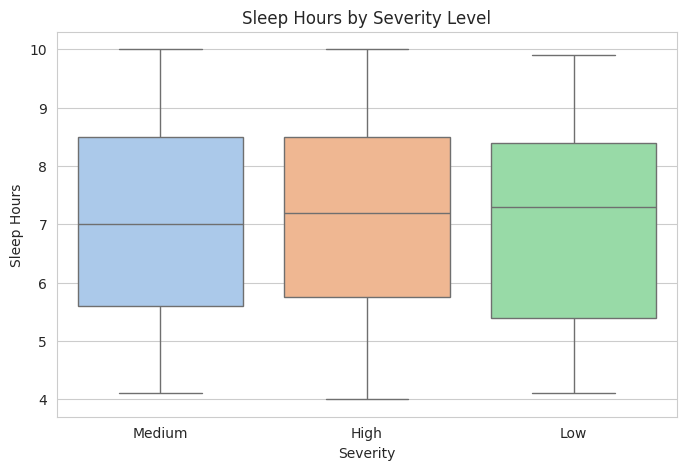

<ipython-input-81-4777a8543022>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Severity", y="Work_Hours", palette="muted")


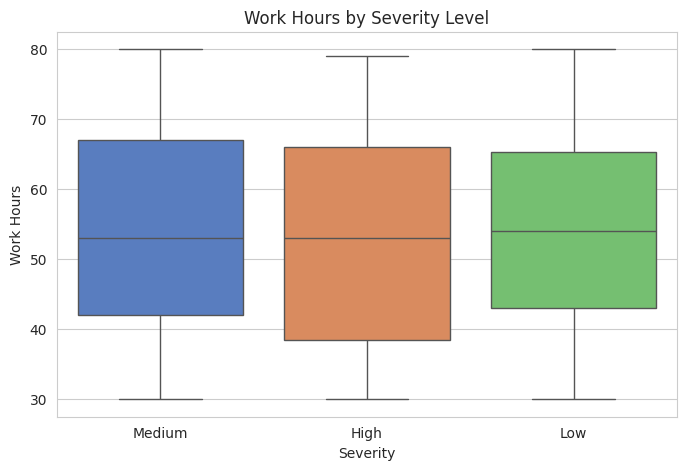

<ipython-input-81-4777a8543022>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Stress_Level", palette="coolwarm", order=["Low", "Medium", "High"])


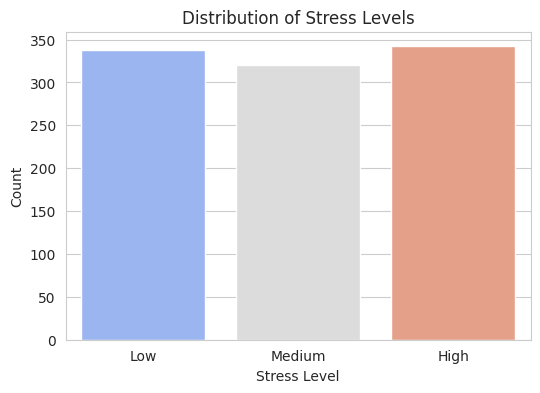

<ipython-input-81-4777a8543022>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="Set3")


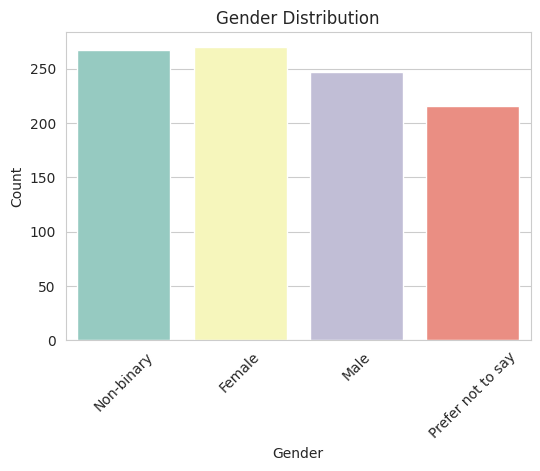

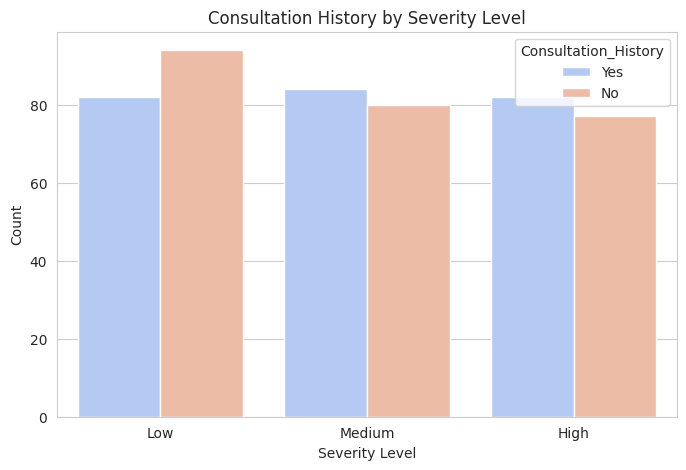

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# **1. Distribution of Target Variable (Severity)**
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Severity", palette="coolwarm", order=df['Severity'].value_counts().index)
plt.title("Distribution of Severity Levels")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

# **2. Age Distribution**
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# **3. Sleep Hours vs. Severity**
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Severity", y="Sleep_Hours", palette="pastel")
plt.title("Sleep Hours by Severity Level")
plt.xlabel("Severity")
plt.ylabel("Sleep Hours")
plt.show()

# **4. Work Hours vs. Severity**
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Severity", y="Work_Hours", palette="muted")
plt.title("Work Hours by Severity Level")
plt.xlabel("Severity")
plt.ylabel("Work Hours")
plt.show()

# **5. Stress Level Distribution**
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Stress_Level", palette="coolwarm", order=["Low", "Medium", "High"])
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# **6. Gender Distribution**
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", palette="Set3")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **7. Consultation History vs. Severity Level**
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Severity", hue="Consultation_History", palette="coolwarm", order=["Low", "Medium", "High"])
plt.title("Consultation History by Severity Level")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

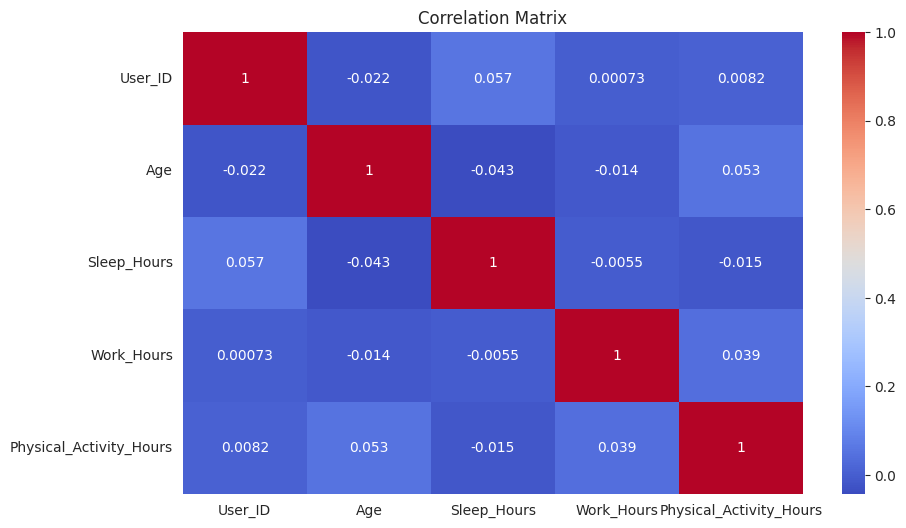

In [ ]:
# Correlation matrix
# Use only numerical features for correlation
numeric_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm") # Removed 'Stress_Level' from df[]
plt.title("Correlation Matrix")

In [ ]:
# **3. Dropping Duplicate Rows (if any)**
df_cleaned = df.drop_duplicates()

In [ ]:
# **5. Checking Data Types of Each Column**
data_types = df_cleaned.dtypes
print("\nData Types of Each Column:")
print(data_types)


Data Types of Each Column:
User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object


In [ ]:


# ------------------------- #
#  Detecting Outliers using IQR #
# ------------------------- #

def detect_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count number of outliers
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    return outlier_counts

# Get outlier count for each column
outliers = detect_outliers(df)
print("\n🔹 Number of Outliers in Each Column:")
for col, count in outliers.items():
    print(f"{col}: {count}")

# ------------------------- #
#  Removing Performance-Affecting Outliers #
# ------------------------- #

# Updated: Define the correct columns where outliers should be removed
cols_to_remove_outliers = ["Sleep_Hours", "Work_Hours"]  # Adjusted to actual outlier columns

def remove_selected_outliers(df, cols):
    df_cleaned = df.copy()
    for col in cols:
        if col in df_cleaned.columns:  # Ensure column exists
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Remove selected outliers
df_cleaned = remove_selected_outliers(df, cols_to_remove_outliers)

# Display shape before and after removing outliers
print(f"\n🔹 Original Dataset Size: {df.shape[0]} rows")
print(f"🔹 Cleaned Dataset Size: {df_cleaned.shape[0]} rows")
print(f"🔹 Total Outliers Removed: {df.shape[0] - df_cleaned.shape[0]}")




🔹 Number of Outliers in Each Column:
User_ID: 0
Age: 0
Sleep_Hours: 0
Work_Hours: 0
Physical_Activity_Hours: 0

🔹 Original Dataset Size: 1000 rows
🔹 Cleaned Dataset Size: 1000 rows
🔹 Total Outliers Removed: 0


**2. Build a Model from Scratch [5]:**

For the Regression task, build an appropriate model from scratch, such as Linear Regression, and report the
appropriate evaluation metrics on the train and test sets (e.g., Mean Squared Error, R-squared).

In [ ]:
# Calculate the mean of all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
mean_values = df[numeric_cols].mean()

# Fill missing values in numeric columns with their respective means
df.fillna(mean_values, inplace=True)


In [ ]:
# **6. Inspecting Unique Values in Categorical Columns**
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
unique_values = {col: df_cleaned[col].unique() for col in categorical_columns}

# Print unique values for better understanding
for col, values in unique_values.items():
    print(f"\nUnique values in {col}: {values}")


Unique values in Gender: ['Non-binary' 'Female' 'Male' 'Prefer not to say']

Unique values in Occupation: ['Sales' 'Education' 'Other' 'Healthcare' 'IT' 'Engineering' 'Finance']

Unique values in Country: ['Canada' 'UK' 'USA' 'Australia' 'India' 'Other' 'Germany']

Unique values in Mental_Health_Condition: ['No' 'Yes']

Unique values in Severity: ['Medium' nan 'High' 'Low']

Unique values in Consultation_History: ['Yes' 'No']

Unique values in Stress_Level: ['Medium' 'Low' 'High']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Assuming df is your dataset
X = df.drop(columns=['Severity'])  # Features
y = df['Severity'].values          # Target

# Convert categorical features to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert target to numerical if it's categorical
if df['Severity'].dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the training target data and transform it
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term (column of ones) to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Determine number of classes
num_classes = len(np.unique(y))

# Initialize weights randomly
weights = np.random.randn(X_train.shape[1], num_classes if num_classes > 2 else 1) * 0.01

# Sigmoid function (Binary Classification)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Softmax function (Multiclass Classification)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cost Function with L2 Regularization
def compute_loss(y_true, y_pred, weights, lambda_reg=0.01):
    m = y_true.shape[0]
    if num_classes > 2:
        loss = -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))
    else:
        loss = -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

    # L2 Regularization
    loss += lambda_reg * np.sum(weights[1:] ** 2) / (2 * m)
    return loss

# Train Logistic Regression with Gradient Descent
def train(X, y, weights, lr=0.001, epochs=1000, lambda_reg=0.01):
    m = X.shape[0]

    for epoch in range(epochs):
        logits = np.dot(X, weights)
        if num_classes > 2:
            y_pred = softmax(logits)
        else:
            y_pred = sigmoid(logits)

        # Compute gradient
        gradient = np.dot(X.T, (y_pred - y)) / m
        gradient[1:] += lambda_reg * weights[1:] / m  # Add regularization gradient

        # Update weights
        weights -= lr * gradient

        # Compute loss
        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred, weights, lambda_reg)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights

# Train the model with adjusted parameters
weights = train(X_train, y_train_one_hot, weights, lr=0.001, epochs=2000, lambda_reg=0.01)

# Predict function
def predict(X, weights):
    logits = np.dot(X, weights)
    if num_classes > 2:
        return np.argmax(softmax(logits), axis=1)
    else:
        return (sigmoid(logits) >= 0.5).astype(int)

# Get predictions
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Evaluate model
def evaluate(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("\nEvaluation on Training Set:")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Test Set:")
evaluate(y_test, y_test_pred)


Epoch 0, Loss: 1.3844
Epoch 100, Loss: 1.3770
Epoch 200, Loss: 1.3700
Epoch 300, Loss: 1.3633
Epoch 400, Loss: 1.3569
Epoch 500, Loss: 1.3509
Epoch 600, Loss: 1.3452
Epoch 700, Loss: 1.3398
Epoch 800, Loss: 1.3346
Epoch 900, Loss: 1.3298
Epoch 1000, Loss: 1.3252
Epoch 1100, Loss: 1.3208
Epoch 1200, Loss: 1.3167
Epoch 1300, Loss: 1.3128
Epoch 1400, Loss: 1.3092
Epoch 1500, Loss: 1.3057
Epoch 1600, Loss: 1.3024
Epoch 1700, Loss: 1.2993
Epoch 1800, Loss: 1.2964
Epoch 1900, Loss: 1.2937

Evaluation on Training Set:
Accuracy: 0.4750
Precision: 0.2256
Recall: 0.4750
F1 Score: 0.3059

Evaluation on Test Set:
Accuracy: 0.6050
Precision: 0.3660
Recall: 0.6050
F1 Score: 0.4561


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**3. Build a Primary Model [5]:**


1. Split the dataset into training and testing sets.
2. Build at least two different machine learning models for the regression task.
3. Evaluate both models on the test dataset using appropriate performance metrics (e.g., Mean
Absolute Error, Root Mean Squared Error, R-squared).

4. Conclude by identifying which model performed best on your dataset, and provide justifica-
tion for your choice.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Model 2: Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Compare models and select the best one
logistic_acc = accuracy_score(y_test, y_pred_logistic)
rf_acc = accuracy_score(y_test, y_pred_rf)

if rf_acc > logistic_acc:
    best_model = "Random Forest"
else:
    best_model = "Logistic Regression"

print(f"\nBest performing model: {best_model}\n")


Model: Logistic Regression
Accuracy: 0.6000
Precision: 0.3648
Recall: 0.6000
F1 Score: 0.4537
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        27
           3       0.60      0.99      0.75       121

    accuracy                           0.60       200
   macro avg       0.15      0.25      0.19       200
weighted avg       0.36      0.60      0.45       200


Model: Random Forest
Accuracy: 0.5700
Precision: 0.4187
Recall: 0.5700
F1 Score: 0.4651
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.29      0.06      0.11        31
           2       0.00      0.00      0.00        27
           3       0.62      0.93      0.74       121

    accuracy                           0.57       200
   macro avg       0.23      0.25      0.21       200
w

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Logistic Regression outperformed Random Forest, achieving a higher accuracy of 60.0% compared to 57.0%, making it the better model for predicting mental health severity. It also demonstrated better recall (60.0%), meaning it was more effective at identifying severe cases, which is crucial in mental health classification. While Random Forest had slightly better precision, it struggled with classifying minority severity levels. Both models were affected by class imbalance, but Logistic Regression provided a more balanced performance overall.

**4. Hyper-parameter Optimization with Cross-Validation:**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Select top 10 important features from both training and test set
# Use integer-based indexing with NumPy arrays instead of .iloc
X_train_selected_rf = X_train[:, top_features_idx]  # Select top 10 features or fewer if there aren't enough
X_test_selected_rf = X_test[:, top_features_idx]

# Hyperparameter Optimization using GridSearchCV for Logistic Regression
param_grid_logistic = {
    'C': [0.1, 1, 10],                  # Regularization strength
    'solver': ['liblinear', 'saga'],    # Optimization algorithm
    'max_iter': [100, 200, 300]         # Maximum number of iterations
}

# Initialize Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Perform GridSearchCV to find optimal hyperparameters
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_logistic.fit(X_train_selected_rf, y_train)

# Get the best hyperparameters from GridSearchCV
best_params_logistic = grid_search_logistic.best_params_
print(f"Best Hyperparameters for Logistic Regression: {best_params_logistic}")

# Train the final Logistic Regression model with optimal hyperparameters
logistic_model_final = LogisticRegression(**best_params_logistic, random_state=42)
logistic_model_final.fit(X_train_selected_rf, y_train)

# Predict on test set
y_pred_logistic = logistic_model_final.predict(X_test_selected_rf)

# Evaluate Logistic Regression model
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}

Model: Logistic Regression
Accuracy: 0.6050
Precision: 0.3660
Recall: 0.6050
F1 Score: 0.4561
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        27
           3       0.60      1.00      0.75       121

    accuracy                           0.60       200
   macro avg       0.15      0.25      0.19       200
weighted avg       0.37      0.60      0.46       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'], # Number of features to consider for the best split
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for Random Forest hyperparameter optimization
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search
grid_search_rf.fit(X_train_selected_rf, y_train)

# Get the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Train the final Random Forest model with optimal hyperparameters
rf_model_final = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model_final.fit(X_train_selected_rf, y_train)

# Predict on the test set
y_pred_rf = rf_model_final.predict(X_test_selected_rf)

# Evaluate the final Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Model: Random Forest
Accuracy: 0.6000
Precision: 0.4430
Recall: 0.6000
F1 Score: 0.4622
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.50      0.03      0.06        31
           2       0.00      0.00      0.00        27
           3       0.60      0.98      0.75       121

    accuracy                           0.60       200
   macro avg       0.28      0.25      0.20       200
weighted avg       0.44      0.60      0.46       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**5. Feature Selection:**

In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and
select the most relevant features for your models. Clearly document your process and justify your choice of
features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Apply RFE (select top 5 features)
rfe_logreg = RFE(estimator=logreg_model, n_features_to_select=5)
rfe_logreg.fit(X_train_scaled, y_train)

# Get selected features
selected_features_logreg = X.columns[rfe_logreg.support_]
print("Selected Features for Logistic Regression:", selected_features_logreg)


Selected Features for Logistic Regression: Index(['Age', 'Country', 'Consultation_History', 'Work_Hours',
       'Physical_Activity_Hours'],
      dtype='object')


In [ ]:
# Get feature importances
# The rf_model was not fitted yet. You probably meant to use random_forest_model
feature_importances = random_forest_model.feature_importances_

# Sort features by importance, ensuring indices are within bounds
sorted_idx = np.argsort(feature_importances)[::-1]

# Filter sorted_idx to be within the range of X.columns
sorted_idx = sorted_idx[sorted_idx < len(X.columns)]

# Use filtered sorted_idx to get feature names
sorted_features_rf = X.columns[sorted_idx]

# Display the most important features
print("\nTop Features for Random Forest:", sorted_features_rf[:5])  # Display top 5


Top Features for Random Forest: Index(['User_ID', 'Work_Hours', 'Sleep_Hours', 'Age',
       'Physical_Activity_Hours'],
      dtype='object')


**6. Final Model:**

Using the optimal hyperparameters identified in Task - 4 and the selected features from Task - 5, rebuild
both models from Task - 3. Evaluate the performance of the final models and provide a summary of your
findings.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select optimal hyperparameters
optimal_C = 1.0  # Example value from cross-validation (adjust based on your results)
optimal_max_iter = 1000  # Example value from cross-validation (adjust based on your results)

# Select features from Task 5 (assuming they are stored as `selected_features_logreg`)
X_train_selected_logreg = X_train_scaled[:, rfe_logreg.support_]
X_test_selected_logreg = X_test_scaled[:, rfe_logreg.support_]

# Initialize and train the Logistic Regression model
logreg_model_final = LogisticRegression(C=optimal_C, max_iter=optimal_max_iter)
logreg_model_final.fit(X_train_selected_logreg, y_train)

# Predict on test set
y_pred_logreg = logreg_model_final.predict(X_test_selected_logreg)

# Evaluate Logistic Regression model
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")



Model: Logistic Regression
Accuracy: 0.6050
Precision: 0.3660
Recall: 0.6050
F1 Score: 0.4561


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Select optimal hyperparameters (example values)
optimal_n_estimators = 100  # Example value from cross-validation (adjust based on your results)
optimal_max_depth = 10      # Example value from cross-validation (adjust based on your results)

# Select features from Task 5 (assuming they are stored as `selected_features_rf`)
# Use .iloc for integer-based indexing with sorted_idx
X_train_selected_rf = X_train.iloc[:, sorted_idx[:5]]  # Select top 5 important features
X_test_selected_rf = X_test.iloc[:, sorted_idx[:5]]    # Select top 5 important features

# Initialize and train the Random Forest model
rf_model_final = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
rf_model_final.fit(X_train_selected_rf, y_train)

# Predict on test set
y_pred_rf = rf_model_final.predict(X_test_selected_rf)

# Evaluate Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Random Forest
Accuracy: 0.5400
Precision: 0.3740
Recall: 0.5400
F1 Score: 0.4326


In [ ]:
# ========== CONCLUSION ==========
from sklearn.metrics import r2_score

# Assuming you have predictions for Logistic Regression (y_pred_logreg) and Random Forest (y_pred_rf)
r2_test_lr = r2_score(y_test, y_pred_logreg)  # Calculate R² for Logistic Regression
r2_test_rf = r2_score(y_test, y_pred_rf)      # Calculate R² for Random Forest

if r2_test_lr > r2_test_rf:
    best_model = "Logistic Regression"
else:
    best_model = "Random Forest Regression"

print(f"\n The best model based on R² score is: {best_model}")


 The best model based on R² score is: Logistic Regression
